<a href="https://colab.research.google.com/github/SWASTIK-CHAMOLA/College-AI-ML-LAB/blob/main/LAB9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Lab 9: Write a Python program to demonstrate various Data Visualization Techniques using Matplotlib and Seaborn libraries.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Ready for Visualization: (7789, 13)


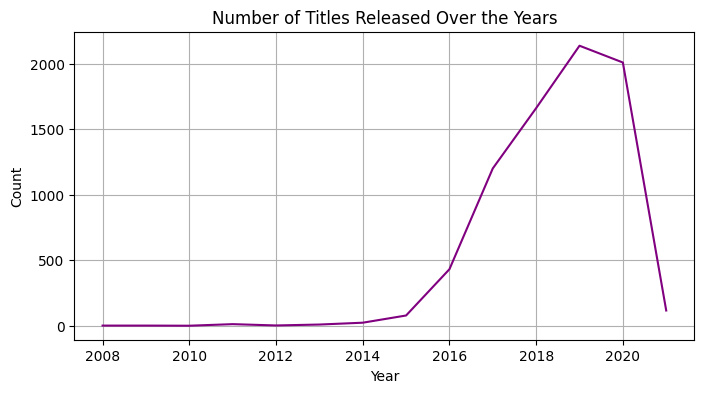

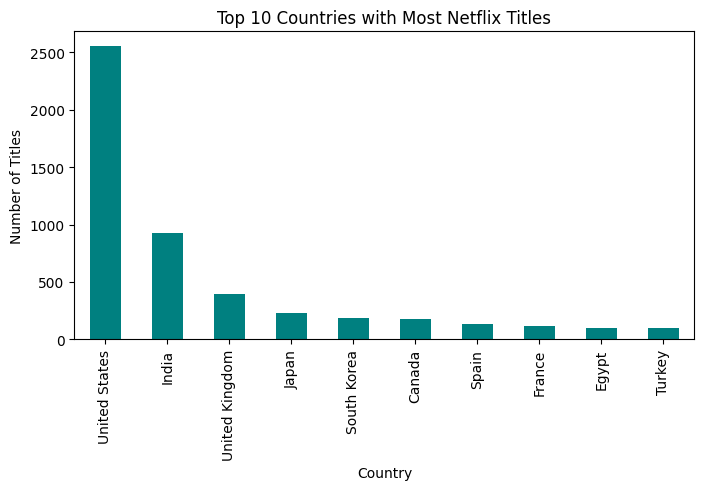

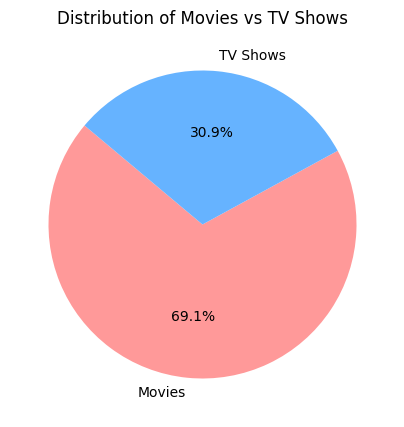

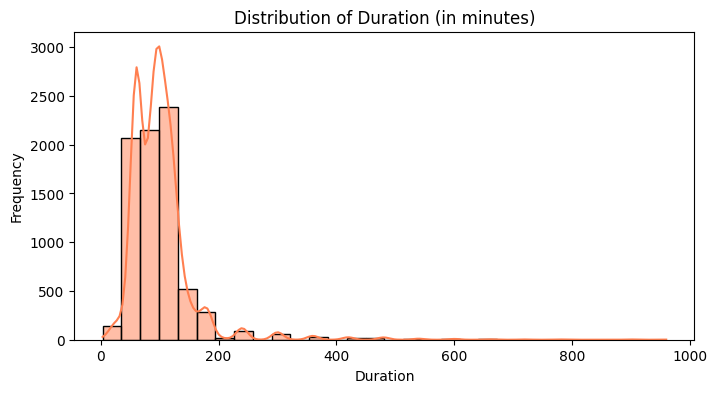

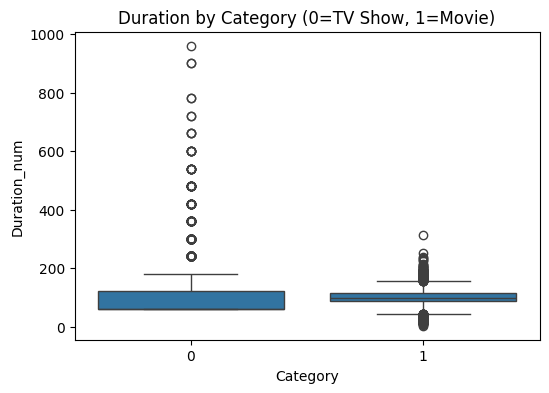

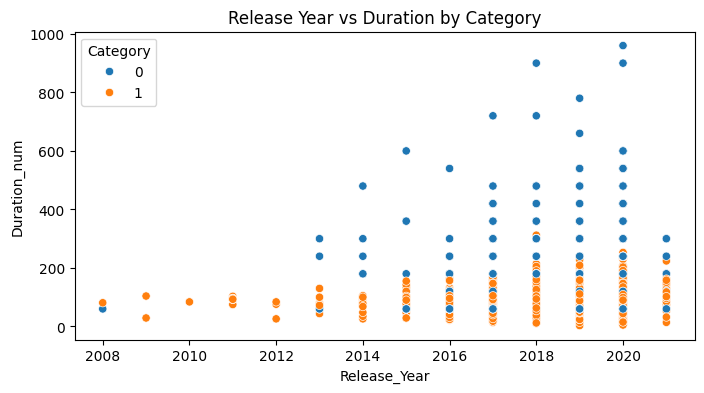

/tmp/ipython-input-3746584415.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='mako')


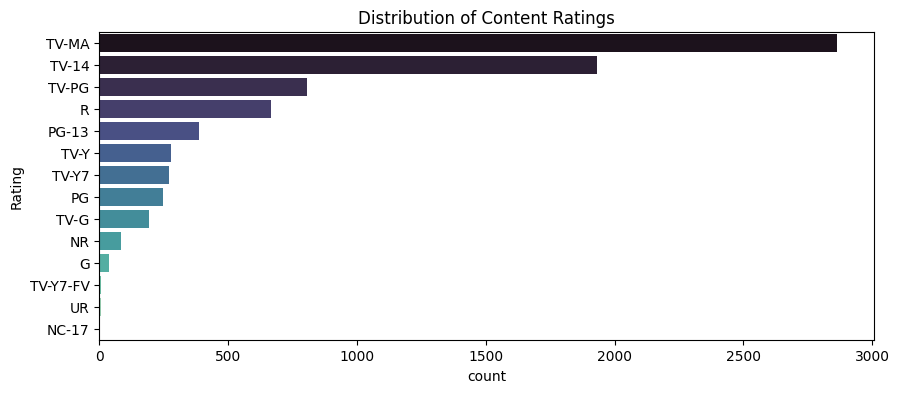

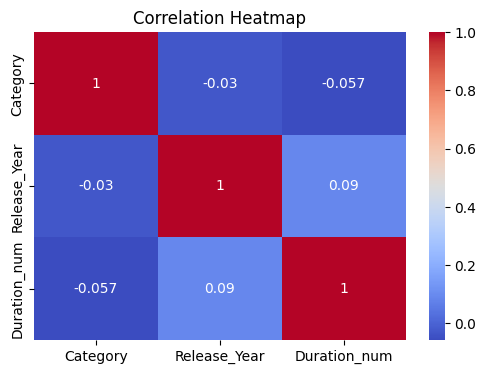

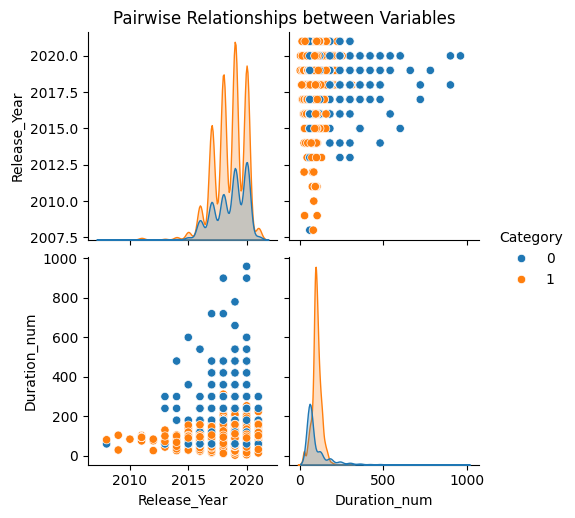


Insights from Visualizations:
- Netflix has more movies than TV shows in the dataset.
- Number of titles increased significantly after 2015.
- Movies tend to have longer durations than TV shows.
- Most titles fall into a few dominant rating categories.
- Duration is weakly correlated with release year and category.


In [3]:
# Lab 9: Demonstrate various Data Visualization Techniques using Matplotlib and Seaborn

# -------------------------------
# Step 1: Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Step 2: Load Dataset
# -------------------------------
file_path = "/content/drive/MyDrive/Colab Notebooks/Netflix Dataset.csv"
df = pd.read_csv(file_path)

# Basic cleaning for visualization
df['Category'] = df['Category'].map({'Movie': 1, 'TV Show': 0})
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

def convert_duration(val):
    if "min" in str(val):
        return int(val.replace(" min", ""))
    elif "Season" in str(val):
        return int(val.split()[0]) * 60  # approximate conversion
    else:
        return np.nan

df['Duration_num'] = df['Duration'].apply(convert_duration)

print("Dataset Ready for Visualization:", df.shape)

# -------------------------------
# Step 3: Matplotlib Visualizations
# -------------------------------

# 1️⃣ Line Plot – Movies released over time
plt.figure(figsize=(8,4))
df['Release_Year'].value_counts().sort_index().plot(kind='line', color='purple')
plt.title("Number of Titles Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 2️⃣ Bar Chart – Top 10 Countries with most content
plt.figure(figsize=(8,4))
df['Country'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

# 3️⃣ Pie Chart – Movie vs TV Show distribution
plt.figure(figsize=(5,5))
labels = ['Movies', 'TV Shows']
sizes = [df['Category'].sum(), len(df) - df['Category'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title("Distribution of Movies vs TV Shows")
plt.show()

# -------------------------------
# Step 4: Seaborn Visualizations
# -------------------------------

# 4️⃣ Histogram – Distribution of duration
plt.figure(figsize=(8,4))
sns.histplot(df['Duration_num'], bins=30, kde=True, color='coral')
plt.title("Distribution of Duration (in minutes)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

# 5️⃣ Boxplot – Duration by Category
plt.figure(figsize=(6,4))
sns.boxplot(x='Category', y='Duration_num', data=df)
plt.title("Duration by Category (0=TV Show, 1=Movie)")
plt.show()

# 6️⃣ Scatter Plot – Release Year vs Duration
plt.figure(figsize=(8,4))
sns.scatterplot(x='Release_Year', y='Duration_num', hue='Category', data=df)
plt.title("Release Year vs Duration by Category")
plt.show()

# 7️⃣ Count Plot – Ratings distribution
plt.figure(figsize=(10,4))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='mako')
plt.title("Distribution of Content Ratings")
plt.show()

# 8️⃣ Heatmap – Correlation between numeric variables
plt.figure(figsize=(6,4))
sns.heatmap(df[['Category', 'Release_Year', 'Duration_num']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 9️⃣ Pairplot – Relationship between numeric features
sns.pairplot(df[['Category', 'Release_Year', 'Duration_num']].dropna(), diag_kind='kde', hue='Category')
plt.suptitle("Pairwise Relationships between Variables", y=1.02)
plt.show()

# -------------------------------
# Step 5: Insights
# -------------------------------
print("\nInsights from Visualizations:")
print("- Netflix has more movies than TV shows in the dataset.")
print("- Number of titles increased significantly after 2015.")
print("- Movies tend to have longer durations than TV shows.")
print("- Most titles fall into a few dominant rating categories.")
print("- Duration is weakly correlated with release year and category.")
